In [1]:
import numpy as np
import pandas as pd

# Data

In [7]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
print(np.shape(X), np.shape(y))

(178, 13) (178,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(124, 13) (54, 13) (124,) (54,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# PCA

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(np.shape(X_train_pca), np.shape(X_test_pca))
lr.fit(X_train_pca, y_train)

(124, 2) (54, 2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pca.explained_variance_ratio_

array([0.37317625, 0.19811576])

In [21]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_pca)
print('accuracy - ', accuracy_score(y_test, y_pred))

accuracy -  0.9259259259259259


In [18]:
pca1 = PCA(n_components=None)
X1_train_pca = pca1.fit_transform(X_train_std)
pca1.explained_variance_ratio_

array([0.37317625, 0.19811576, 0.09866413, 0.07685036, 0.06732725,
       0.04945188, 0.03773479, 0.02573585, 0.02109269, 0.01794351,
       0.0141015 , 0.01317157, 0.00663447])

# LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)                           # supervised
X_test_lda = lda.transform(X_test_std)
lr_lda = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_lda.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_lda = lr_lda.predict(X_test_lda)
print('accuracy - ', accuracy_score(y_test, y_pred_lda))

accuracy -  0.9814814814814815


# KPCA

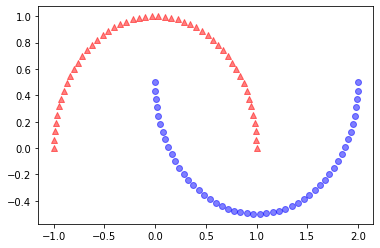

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

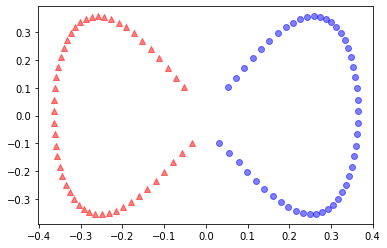

In [30]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)